# Linear Regression Algorithm
## To Predict the Percentage of Marks a Student is Expected to Score Based on the Number of Hours He Studied.


### Importing Required Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Reading

In [2]:
df=pd.read_csv("http://bit.ly/w-data")

In [17]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [19]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Data Cleaning

In [4]:
df.isnull().head()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


<AxesSubplot:>

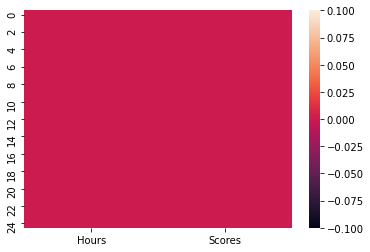

In [5]:
sns.heatmap(df.isnull())

In [12]:
df.duplicated().sum()

0

### Data Visualization

<AxesSubplot:>

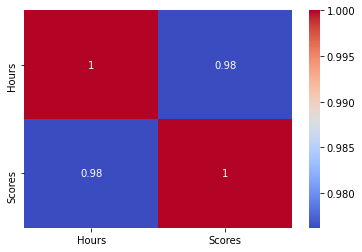

In [15]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

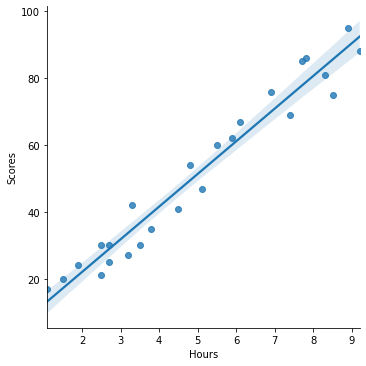

In [16]:
sns.lmplot(x='Hours',y='Scores',data=df)

### The percentage of scores is directly proportional to the number of hours studied.

### Applying Linear Regression Model to the Dataset

In [35]:
x=df['Hours'].values.reshape(25,1)
y=df['Scores'].values

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [37]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [38]:
lr.fit(x_train,y_train)

LinearRegression()

### Plotting the Regression Line 

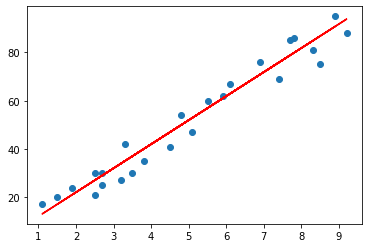

In [44]:
line=lr.coef_*x + lr.intercept_
plt.scatter(x,y)
plt.plot(x,line,color='red')

### Making Predictions

In [45]:
predictions=lr.predict(x_test)

Text(0, 0.5, 'Predicted Values')

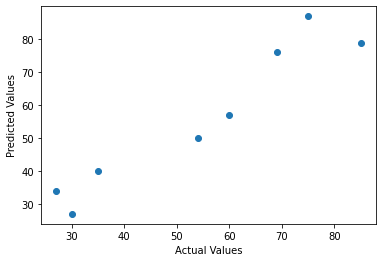

In [48]:
plt.scatter(y_test,predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

C:\Users\91766\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals Distribution')

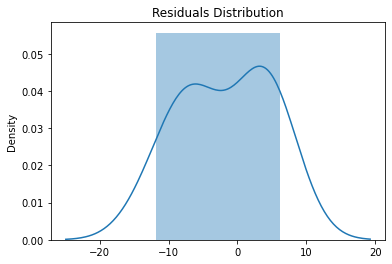

In [49]:
sns.distplot(y_test-predictions)
plt.title('Residuals Distribution')

### Prediction for 9.8 hours study

In [75]:
hours = 9.8
own_pred = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))


No of Hours = 9.8
Predicted Score = 99.77434476880462


### Evaluating Model

In [53]:
from sklearn import metrics
k=metrics.mean_absolute_error(y_test,predictions)
l=metrics.mean_squared_error(y_test,predictions)
m=np.sqrt(metrics.mean_squared_error(y_test,predictions))
print('mean_absolute_error : {}'.format(k))
print('mean_squared_error : {}'.format(l))
print('root_mean_squared_error : {}'.format(m))

mean_absolute_error : 5.864954643694258
mean_squared_error : 41.634865645528876
root_mean_squared_error : 6.4525084769823335
